# PLOTTING FOR EXPLORATORY DATA ANALYSIS

## Basic Terminlogy

What is EDA?

Data-point/vector/Observation

Data-set.

Feature/Variable/Input-variable/independent-varibale

Label/depdendent-variable/Output-varible/Class/Class-label/Response label

Vector: 2-D, 3-D, 4-D,.... n-D

Q. What is a 1-D vector: Scalar

## Iris Flower dataset

* Toy Dataset: Iris Dataset: [https://en.wikipedia.org/wiki/Iris_flower_data_set]
* A simple dataset to learn the basics.
* 3 flowers of Iris species. [see images on wikipedia link above]
* 1936 by Ronald Fisher.
* Petal and Sepal: http://terpconnect.umd.edu/~petersd/666/html/iris_with_labels.jpg
* Objective: Classify a new flower as belonging to one of the 3 classes given the 4 features.
* Importance of domain knowledge.
* Why use petal and sepal dimensions as features?
* Why do we not use 'color' as a feature?

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


In [4]:

'''downlaod iris.csv from https://raw.githubusercontent.com/uiuc-cse/data-fa14/gh-pages/data/iris.csv'''
#Load Iris.csv into a pandas dataFrame.
iris = pd.read_csv("iris.csv")

In [8]:
# (Q) how many data-points and features?
print (iris.shape)

(150, 6)


In [12]:
#(Q) What are the column names in our dataset?
print(iris.columns)

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')


In [14]:
#(Q) How many data points for each class are present? 
#(or) How many flowers for each species are present?

iris["Species"].value_counts()
# balanced-dataset vs imbalanced datasets
#Iris is a balanced dataset as the number of data points for every class is 50.

Iris-setosa        50
Iris-virginica     50
Iris-versicolor    50
Name: Species, dtype: int64

## 2-D Scatter Plot

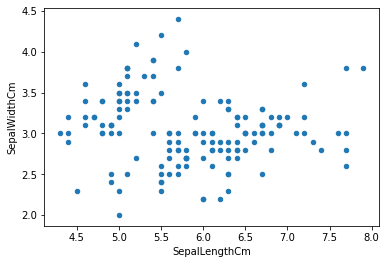

In [16]:
#2-D scatter plot:
#ALWAYS understand the axis: labels and scale.

iris.plot(kind = 'scatter',x = 'SepalLengthCm' , y = 'SepalWidthCm')
plt.show()
#cannot make much sense out it. 
#What if we color the points by thier class-label/flower-type.

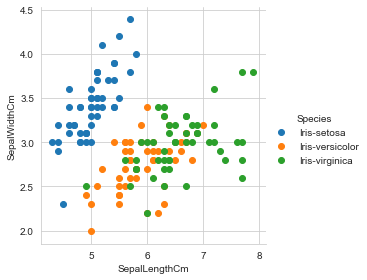

In [20]:
# 2-D Scatter plot with color-coding for each flower type/class.
# Here 'sns' corresponds to seaborn. 
sns.set_style("whitegrid");
sns.FacetGrid(iris, hue = 'Species', size = 4) \
    .map(plt.scatter, "SepalLengthCm", "SepalWidthCm") \
    .add_legend();
plt.show()


# Notice that the blue points can be easily seperated 
# from red and green by drawing a line. 
# But red and green data points cannot be easily seperated.
# Can we draw multiple 2-D scatter plots for each combination of features?
# How many cobinations exist? 4C2 = 6.

## Observation(s):

1. Using sepal_length and sepal_width features, we can distinguish Setosa flowers from others.
2. Seperating Versicolor from Viginica is much harder as they have considerable overlap.

## pair plot

C:\Users\Akshay\anaconda3_2020\envs\my_env\lib\site-packages\seaborn\axisgrid.py:2071: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


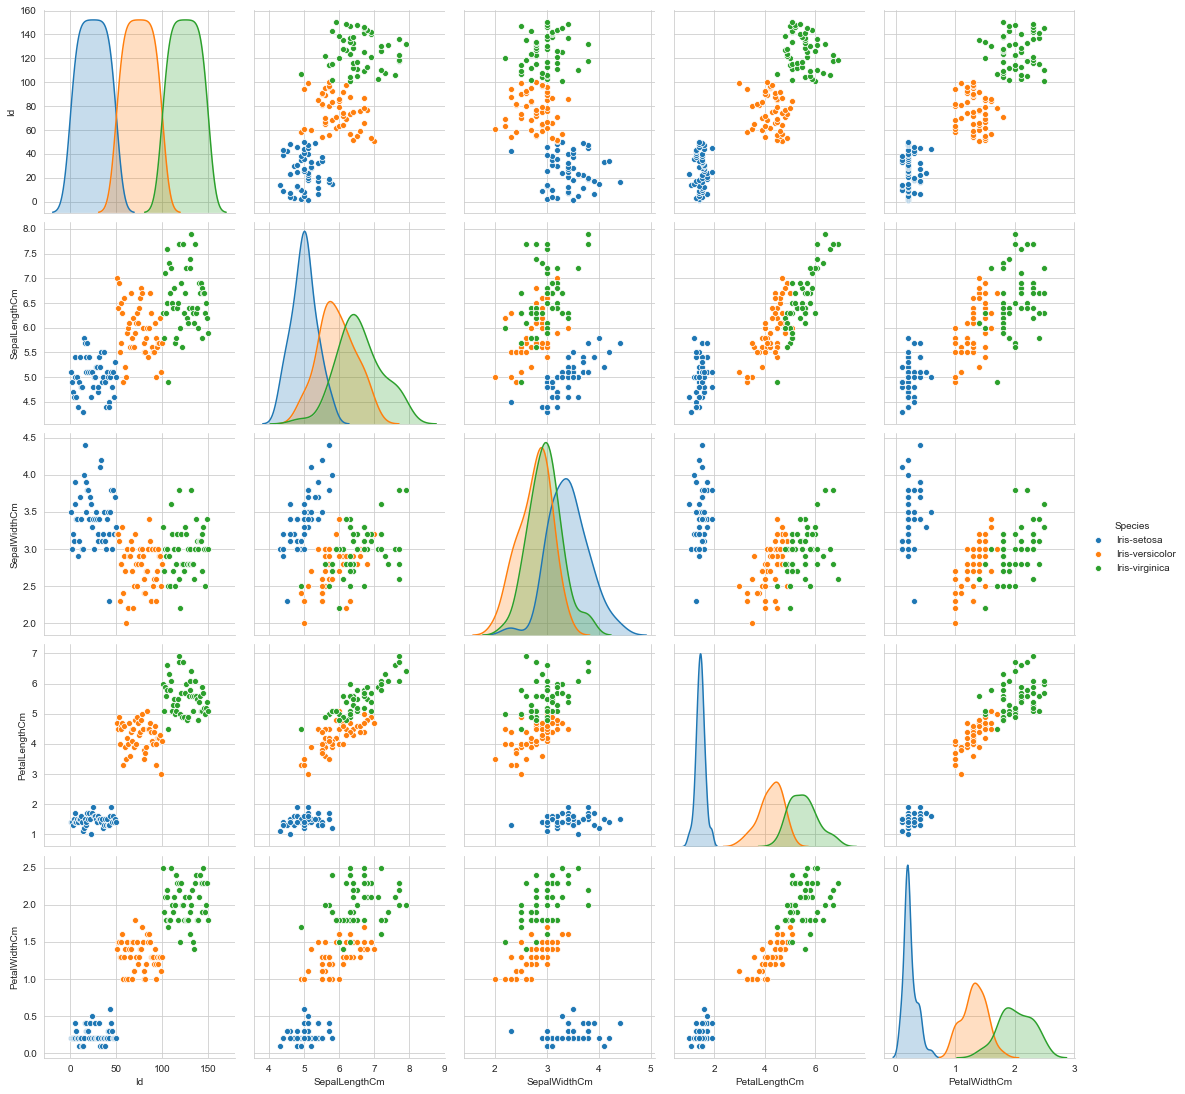

In [6]:
# pairwise scatter plot: Pair-Plot
# Dis-advantages: 
##Can be used when number of features are high.
##Cannot visualize higher dimensional patterns in 3-D and 4-D. 
#Only possible to view 2D patterns.
plt.close();
sns.set_style('whitegrid')
sns.pairplot(iris, hue = 'Species',height = 3)
plt.show()

### Observations

1. petal_length and petal_width are the most useful features to identify various flower types.
2. While Setosa can be easily identified (linearly seperable), Virnica and Versicolor have some overlap (almost linearly seperable).
3. We can find "lines" and "if-else" conditions to build a simple model to classify the flower types.

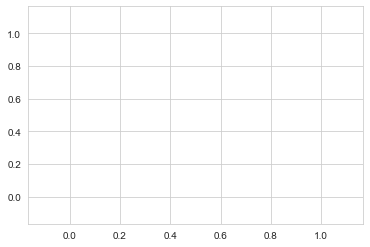

In [11]:
# What about 1-D scatter plot using just one feature?
#1-D scatter plot of petal-length
import numpy as np
iris_setosa = iris.loc[iris["Species"] == "setosa"];
iris_virginica = iris.loc[iris["Species"] == "virginica"];
iris_versicolor = iris.loc[iris["Species"] == "versicolor"];
#print(iris_setosa["petal_length"])
plt.plot(iris_setosa["PetalLengthCm"], np.zeros_like(iris_setosa['PetalLengthCm']), 'o')
plt.plot(iris_versicolor["PetalLengthCm"], np.zeros_like(iris_versicolor['PetalLengthCm']), 'o')
plt.plot(iris_virginica["PetalLengthCm"], np.zeros_like(iris_virginica['PetalLengthCm']), 'o')

plt.show()
#Disadvantages of 1-D scatter plot: Very hard to make sense as points 
#are overlapping a lot.
#Are there better ways of visualizing 1-D scatter plots?

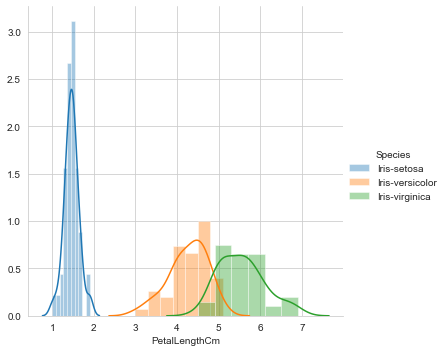

In [19]:
sns.FacetGrid(iris, hue = 'Species', height = 5) \
    .map(sns.distplot, "PetalLengthCm") \
    .add_legend()
plt.show()

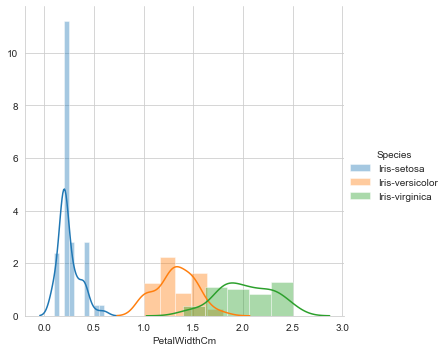

In [20]:
sns.FacetGrid(iris, hue = 'Species', height = 5) \
    .map(sns.distplot, "PetalWidthCm") \
    .add_legend()
plt.show()

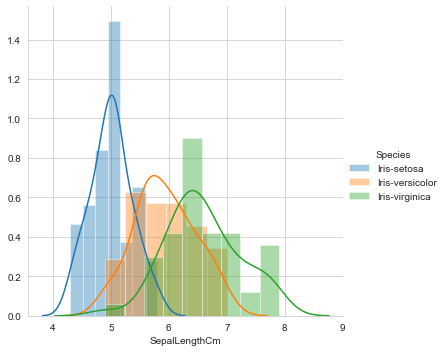

In [21]:
sns.FacetGrid(iris, hue = 'Species', height = 5) \
    .map(sns.distplot, "SepalLengthCm") \
    .add_legend()
plt.show()

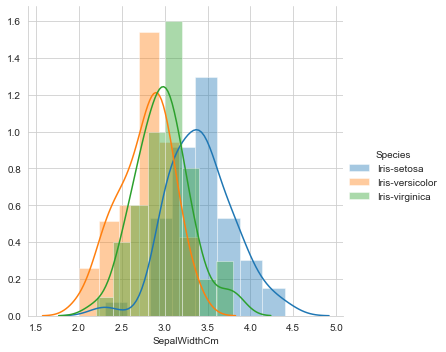

In [22]:
sns.FacetGrid(iris, hue = 'Species', height = 5) \
    .map(sns.distplot, "SepalWidthCm") \
    .add_legend()
plt.show()

[0.24666667 0.08666667 0.         0.02       0.05333333 0.17333333
 0.19333333 0.12       0.07333333 0.03333333]
[1.   1.59 2.18 2.77 3.36 3.95 4.54 5.13 5.72 6.31 6.9 ]


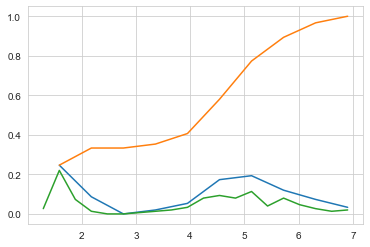

In [31]:
# Need for Cumulative Distribution Function (CDF)
# We can visually see what percentage of versicolor flowers have a 
# petal_length of less than 5?
# How to construct a CDF?
# How to read a CDF?

#Plot CDF of petal_length

counts, bin_edges = np.histogram(iris['PetalLengthCm'], bins=10, density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf)

counts, bin_edges = np.histogram(iris['PetalLengthCm'], bins = 20, density = True)
pdf = counts/(sum(counts))
plt.plot(bin_edges[1:], pdf);

plt.show()

[0.24666667 0.08666667 0.         0.02       0.05333333 0.17333333
 0.19333333 0.12       0.07333333 0.03333333]
[1.   1.59 2.18 2.77 3.36 3.95 4.54 5.13 5.72 6.31 6.9 ]
[0.24666667 0.08666667 0.         0.02       0.05333333 0.17333333
 0.19333333 0.12       0.07333333 0.03333333]
[1.   1.59 2.18 2.77 3.36 3.95 4.54 5.13 5.72 6.31 6.9 ]
[0.24666667 0.08666667 0.         0.02       0.05333333 0.17333333
 0.19333333 0.12       0.07333333 0.03333333]
[1.   1.59 2.18 2.77 3.36 3.95 4.54 5.13 5.72 6.31 6.9 ]


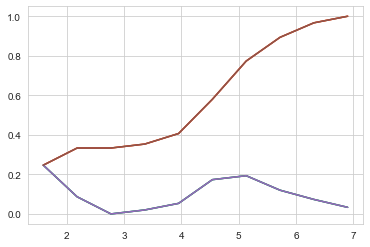

In [37]:
# Plots of CDF of petal_length for various types of flowers.

# Misclassification error if you use petal_length only.

counts, bin_edges = np.histogram(iris['PetalLengthCm'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)


# virginica
counts, bin_edges = np.histogram(iris['PetalLengthCm'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)


#versicolor
counts, bin_edges = np.histogram(iris['PetalLengthCm'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)


plt.show();